# This Notebook produces all 4 subplots of Figure 12

In [1]:
import pickle as pkl
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import torch
import os
import h5py
import re

In [2]:
# font = {'family' : 'normal',
#         'size'   : 14}
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Palatio']
rcParams['text.usetex'] = True

fontsize = 18 #adjust

#plt.rc('font', **font)
figure_path = "./figures/"

In [3]:
alpha_pr = [0.015, 0.02, 0.04, 0.05, 0.07, 0.10, 0.12, 0.13, 0.15]
alpha_fwbw = [0.025, 0.027, 0.030, 0.031, 0.032, 0.033, 0.034, 0.035, 0.037, 0.040]
alpha = [0.015, 0.02, 0.05, 0.070, 0.10, 0.12, 0.13, 0.14, 0.15]
alpha_pr_no_box = [0.02, 0.03, 0.04, 0.05, 0.06, 0.07]
alpha_fwbw_no_box = [0.028, 0.031, 0.032, 0.033, 0.034, 0.035]
alpha_no_box = [0.015, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.10, 0.12, 0.15]

In [4]:
log_path = "./logs_precomputed"

In [5]:
alpha_pr_file_names = [f"mnist_matlab_e05_pr_{int(1e2*x):02d}_wid-1_jp1_os2.txt" if int(x*1e2)*10 == int(x*1e3) else f"mnist_matlab_e05_pr_{int(1e3*x):03d}_wid-1_jp1_os2.txt" for x in alpha_pr]
alpha_pr_no_box_file_names = [f"mnist_matlab_e05_pr_{int(1e2*x):02d}_wid-1_jp1_os2_no_box.txt" if int(x*1e2)*10 == int(x*1e3) else f"mnist_matlab_e05_pr_{int(1e3*x):03d}_wid-1_jp1_os2_no_box.txt" for x in alpha_pr_no_box]
alpha_fwbw_file_names = [f"mnist_matlab_e05_fwbw_{int(1e3*x):03d}_wid-1_os2.txt" for x in alpha_fwbw]
alpha_fwbw_no_box_file_names = [f"mnist_matlab_e05_fwbw_{int(1e3*x):03d}_wid-1_os2_no_box.txt" for x in alpha_fwbw_no_box]
alpha_file_names = [f"mnist_matlab_e05_pr_{int(1e2*x):02d}_sfwbw_aa_wid-1_jp1_os2.txt" if int(x*1e2)*10 == int(x*1e3) else f"mnist_matlab_e05_pr_{int(1e3*x):03d}_sfwbw_aa_wid-1_jp1_os2.txt" for x in alpha]
alpha_no_box_file_names = [f"mnist_matlab_e05_pr_{int(1e2*x):02d}_sfwbw_aa_wid-1_jp1_os2_no_box.txt" if int(x*1e2)*10 == int(x*1e3) else f"mnist_matlab_e05_pr_{int(1e3*x):03d}_sfwbw_aa_wid-1_jp1_os2_no_box.txt" for x in alpha_no_box]


In [6]:
def parse_log(fn):
    file = os.path.join(log_path, fn)
    with open(file,"r") as f:
        lines = f.readlines()
        for line in lines:
            if line.startswith("Image: 100:"):
                match = re.match("Image: 100: Converged: .* \[([0-9]*)/100\], Verified: .* \[([0-9]*)/.*\], Adv Robust: .*, Nat: .* \[([0-9]*)/100\], time: .*/.*/([0-9,\.]*)/.*/.*", line)
                con = int(match.group(1))
                ver = int(match.group(2))
                nat = int(match.group(3))
                time = float(match.group(4))
                break
        else:
            print(fn)
            assert False
    return con, ver, nat, time

In [7]:
alpha_pr_con = [parse_log(x)[0] for x in alpha_pr_file_names]
alpha_pr_ver = [parse_log(x)[1] for x in alpha_pr_file_names]

alpha_fwbw_con = [parse_log(x)[0] for x in alpha_fwbw_file_names]
alpha_fwbw_ver = [parse_log(x)[1] for x in alpha_fwbw_file_names]

alpha_con = [parse_log(x)[0] for x in alpha_file_names]
alpha_ver = [parse_log(x)[1] for x in alpha_file_names]

alpha_pr_no_box_con = [parse_log(x)[0] for x in alpha_pr_no_box_file_names]
alpha_pr_no_box_ver = [parse_log(x)[1] for x in alpha_pr_no_box_file_names]

alpha_fwbw_no_box_con = [parse_log(x)[0] for x in alpha_fwbw_no_box_file_names]
alpha_fwbw_no_box_ver = [parse_log(x)[1] for x in alpha_fwbw_no_box_file_names]

alpha_no_box_con = [parse_log(x)[0] for x in alpha_no_box_file_names]
alpha_no_box_ver = [parse_log(x)[1] for x in alpha_no_box_file_names]

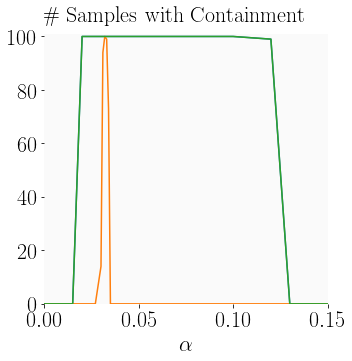

In [8]:
### Produce Figure 12 a
fig, ax = plt.subplots(figsize=(5,5))

fontsize = 22

data = [(alpha_pr, alpha_pr_con, alpha_pr_ver,"PR"),
        (alpha_fwbw, alpha_fwbw_con, alpha_fwbw_ver,"FwdBwd"),
        (alpha, alpha_con, alpha_ver, "PR then FwdBwd"),
       ]

c=None

for a, con, ver, leg in data:
    p = ax.plot([0]+a+[1],[0]+con+[0],linestyle="solid",label=leg, color=c)

ax.set_xlim([0,0.15])
ax.set_ylim([0,101])
plt.ylabel(r"\# Samples with Containment",rotation=0 , fontsize=fontsize,ha="left")
ax.yaxis.set_label_coords(0.0, 1.03)
plt.xlabel(r"$\alpha$", fontsize=fontsize)
plt.xticks(np.arange(0,0.15+0.001,0.05))
plt.yticks(np.arange(0,100+0.001,20))

ax.set_facecolor( (0.98, 0.98, 0.98) )
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.setp(ax.get_xticklabels(), fontsize=fontsize)
plt.setp(ax.get_yticklabels(), fontsize=fontsize)
fig.tight_layout()

# fig.savefig(os.path.join(figure_path,"alpha_cont.eps"), bbox_inches="tight")
# fig.savefig(os.path.join(figure_path,"alpha_cont.png"), bbox_inches="tight")

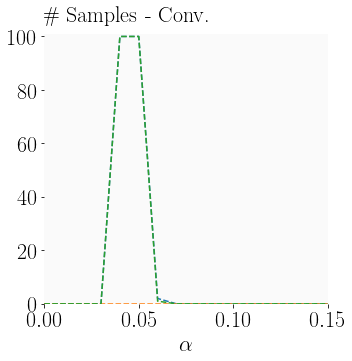

In [9]:
### Produce Figure 12 b
fig, ax = plt.subplots(figsize=(5,5))

data = [(alpha_pr_no_box, alpha_pr_no_box_con, alpha_pr_no_box_ver, "PR no Box"),
        (alpha_fwbw_no_box, alpha_fwbw_no_box_con, alpha_fwbw_no_box_ver, "FwdBwd no Box"),
        (alpha_no_box, alpha_no_box_con, alpha_no_box_ver, "PR then FwdBwd no Box"),
       ]

c=None

for a, con, ver, leg in data:
    p = ax.plot([0]+a+[1],[0]+con+[0],linestyle="dashed",label=leg, color=c)

ax.set_xlim([0,0.15])
ax.set_ylim([0,101])
plt.ylabel(r"\# Samples - Conv.",rotation=0 , fontsize=fontsize,ha="left")
ax.yaxis.set_label_coords(0.0, 1.03)
plt.xlabel(r"$\alpha$", fontsize=fontsize)
plt.xticks(np.arange(0,0.15+0.001,0.05))
plt.yticks(np.arange(0,100+0.001,20))

ax.set_facecolor( (0.98, 0.98, 0.98) )
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.setp(ax.get_xticklabels(), fontsize=fontsize)
plt.setp(ax.get_yticklabels(), fontsize=fontsize)
fig.tight_layout()

# fig.savefig(os.path.join(figure_path,"alpha_cont_no_box.eps"), bbox_inches="tight")
# fig.savefig(os.path.join(figure_path,"alpha_cont_no_box.png"), bbox_inches="tight")

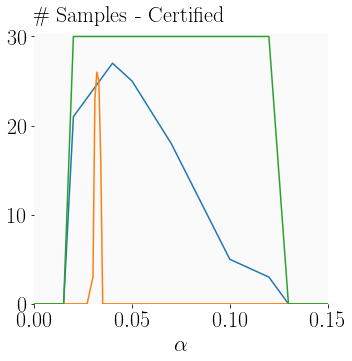

In [10]:
### Produce Figure 12 c
fig, ax = plt.subplots(figsize=(5,5))

data = [(alpha_pr, alpha_pr_con, alpha_pr_ver,"PR"),
        (alpha_fwbw, alpha_fwbw_con, alpha_fwbw_ver,"FwdBwd"),
        (alpha, alpha_con, alpha_ver, "PR then FwdBwd"),
       ]

c=None

for a, con, ver, leg in data:
    p = ax.plot([0]+a+[1],[0]+ver+[0],linestyle="solid",label=leg, color=c)

ax.set_xlim([0,0.15])
ax.set_ylim([0,30.3])
plt.ylabel(r"\# Samples - Certified",rotation=0 , fontsize=fontsize,ha="left")
ax.yaxis.set_label_coords(0.0, 1.03)
plt.xlabel(r"$\alpha$", fontsize=fontsize)
plt.xticks(np.arange(0,0.15+0.001,0.05))
plt.yticks(np.arange(0,30+0.001,10))

ax.set_facecolor( (0.98, 0.98, 0.98) )
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.setp(ax.get_xticklabels(), fontsize=fontsize)
plt.setp(ax.get_yticklabels(), fontsize=fontsize)
fig.tight_layout()

# fig.savefig(os.path.join(figure_path,"alpha_cert.eps"), bbox_inches="tight")
# fig.savefig(os.path.join(figure_path,"alpha_cert.png"), bbox_inches="tight")

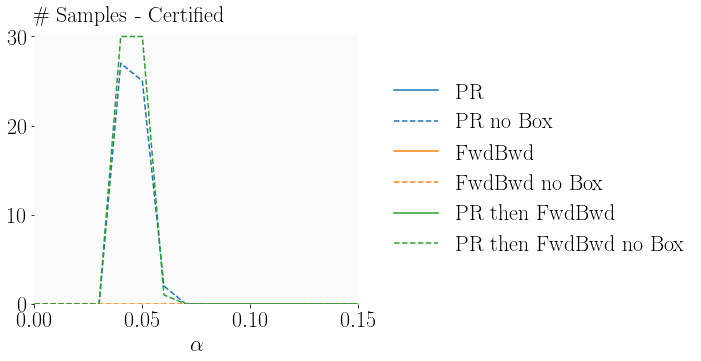

In [11]:
### Produce Figure 12 d

fig, ax = plt.subplots(figsize=(10,5))

data = [(alpha_pr, alpha_pr_con, alpha_pr_ver,"PR"),
        (alpha_pr_no_box, alpha_pr_no_box_con, alpha_pr_no_box_ver, "PR no Box"),
        (alpha_fwbw, alpha_fwbw_con, alpha_fwbw_ver,"FwdBwd"),
        (alpha_fwbw_no_box, alpha_fwbw_no_box_con, alpha_fwbw_no_box_ver, "FwdBwd no Box"),
        (alpha, alpha_con, alpha_ver, "PR then FwdBwd"),
        (alpha_no_box, alpha_no_box_con, alpha_no_box_ver, "PR then FwdBwd no Box"),
       ]

c=None

for a, con, ver, leg in data:
    if c is not None:
        p = ax.plot([0]+a+[1],[0]+ver+[0],linestyle="dashed",label=leg, color=c)
        c=None
    else:
        p = ax.plot([-1],[-1],linestyle="solid",label=leg, color=c)
        c = p[0].get_color()

ax.legend(fontsize=fontsize,bbox_to_anchor=(1.05, 0.5), loc='center left', frameon=False)
ax.set_xlim([0,0.15])
ax.set_ylim([0,30.3])
plt.ylabel(r"\# Samples - Certified",rotation=0 , fontsize=fontsize,ha="left")

ax.yaxis.set_label_coords(0.0, 1.03)
plt.xlabel(r"$\alpha$", fontsize=fontsize)
plt.xticks(np.arange(0,0.15+0.001,0.05))
plt.yticks(np.arange(0,30+0.001,10))

ax.set_facecolor( (0.98, 0.98, 0.98) )
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.setp(ax.get_xticklabels(), fontsize=fontsize)
plt.setp(ax.get_yticklabels(), fontsize=fontsize)
fig.tight_layout()

# fig.savefig(os.path.join(figure_path,"alpha_cert_no_box.eps"), bbox_inches="tight")
# fig.savefig(os.path.join(figure_path,"alpha_cert_no_box.png"), bbox_inches="tight")